Assignment 05 <br>
Nikos Periklis Chourdas <br>
nikos.hourdas@gmail.com

In [1]:
import numpy as np 
import pandas as pd 
import neurolab as nl 
import pylab as pl 

In [3]:
import matplotlib.pyplot as plt

import the dataset

In [4]:
from sklearn.datasets import load_wine
wine = load_wine()
dataset = wine.data
target = wine.target

elbow method

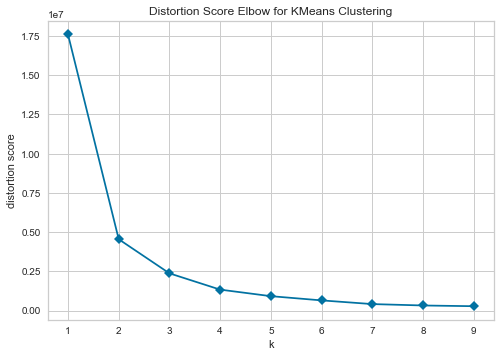

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans()


visualizer = KElbowVisualizer(model, k=(1,10), timings=False ,locate_elbow=False)

visualizer.fit(dataset)

visualizer.show() 


Silhouette score 

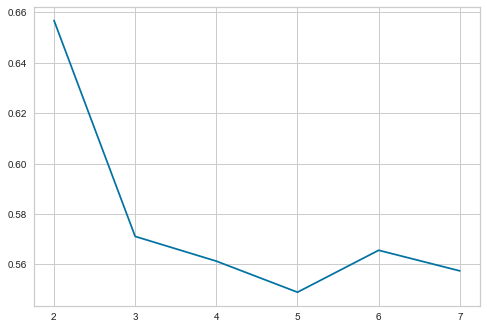

In [16]:
from sklearn.metrics import silhouette_score

sse = []

for k in range(2, 8):
 kmeans = KMeans(n_clusters=k).fit(dataset)
 sse.append([k, silhouette_score(dataset, kmeans.labels_)])
    
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1]);
plt.show()

scale data 


In [23]:
from sklearn import preprocessing

dataset = preprocessing.MinMaxScaler().fit_transform(dataset)

create Kohonene network 

In [24]:
net = nl.net.newc(nl.tool.minmax(dataset),10)

train with cwta method 

In [25]:
error = net.trainf = nl.train.train_cwta(net,dataset,epochs = 1000 , show = 100)

Epoch: 100; Error: 280.6365035866497;
Epoch: 200; Error: 270.15552195825813;
Epoch: 300; Error: 268.58493149437516;
Epoch: 400; Error: 272.7752452595235;
Epoch: 500; Error: 281.0078260431427;
Epoch: 600; Error: 292.06359297717233;
Epoch: 700; Error: 284.86609335170374;
Epoch: 800; Error: 302.9580741999326;
Epoch: 900; Error: 280.17193220659817;
Epoch: 1000; Error: 287.19735981581175;
The maximum number of train epochs is reached


vizualize results

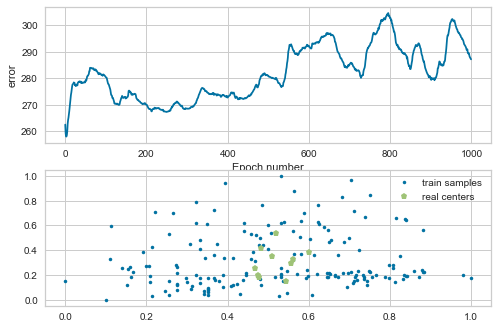

In [26]:
plt.title('Classification Problem')
plt.figure(1)
plt.subplot(2,1,1)
plt.plot(error)
plt.xlabel('Epoch number')
plt.ylabel('error')

w = net.layers[0].np['w']
plt.subplot(2,1,2)
plt.plot(dataset[:,0], dataset[:,1], '.', \
        w[:,0], w[:,1], 'p')
plt.legend(['train samples', 'real centers'])
plt.show();

Train the network with wta method 

In [27]:
error = net.trainf = nl.train.train_wta(net, dataset , epochs = 1000 , show = 100)

Epoch: 100; Error: 222.95061025001507;
Epoch: 200; Error: 222.83175561487133;
Epoch: 300; Error: 222.83443364216285;
Epoch: 400; Error: 222.83477649838505;
Epoch: 500; Error: 222.83481546748635;
Epoch: 600; Error: 222.83482327259844;
Epoch: 700; Error: 222.83482605109185;
Epoch: 800; Error: 222.83482711863024;
Epoch: 900; Error: 222.83482750251153;
Epoch: 1000; Error: 222.8348276321206;
The maximum number of train epochs is reached


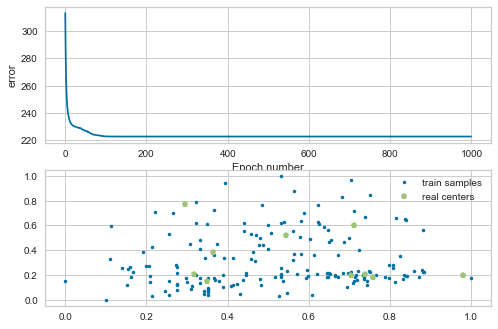

In [28]:
plt.figure(2)
plt.subplot(2,1,1)
plt.plot(error)
plt.xlabel('Epoch number')
plt.ylabel('error')
w = net.layers[0].np['w']
plt.subplot(2,1,2)
plt.plot(dataset[:,0], dataset[:,1], '.', \
        w[:,0], w[:,1], 'p')
plt.legend(['train samples', 'real centers'])
plt.show();